# Lineární hyperbolický systém PDR 1. řádu

**Definice:**
Systém PDR ve tvaru $U_t + A U_x = 0$, kde $U: \mathbb R\times\mathbb R_+ \to \mathbb R^l$ a $A \in \mathbb R^{l,l}$ nazveme *hyperbolickým* právě tehdy, když matice $A$ má $l$ reálných vlastních čísel a $l$ lineárně nezávislých vlastních vektorů.



## Charakteristické proměnné

Splňuje-li $A$ výše uvedené podmínky, je možné ji rozložit na součin
$$
    A = R \Lambda R^{-1},
$$
kde $\Lambda=diag(\lambda_1, \lambda_2, ..., \lambda_l)$ je diagonální matice a $R$ obsahuje ve sloupcích příslušné vlastní vektory, tj. $R=[\vec{r}_1, \vec{r}_2, ..., \vec{r}_l]$. 

Systém pak lze přepsat jako
$$
U_t + R \Lambda R^{-1} U_x = 0
$$
a po vynásobení maticí $R^{-1}$ zleva dostáváme
$$
R^{-1} U_t + R^{-1} R \Lambda R^{-1} U_x = (R^{-1} U)_t + E \Lambda (R^{-1} U)_x = 0.
$$

Označíme-li $V = R^{-1} U$, je původní systém ekvivalentní systému $l$ nezávislých rovnic 
$$
    V_t + \Lambda V_x = 0
$$
což je po složkách
$$
    \frac{\partial v_k}{\partial t} + \lambda_k \frac{\partial v_k}{\partial x} = 0.
$$

**Definice:** Mějme hyperbolický systém $U_t + A U_x = 0$. Proměnné $V = R^{-1} U$, kde $R$ je matice složená z vlastních vektorů matice $A$, nazveme *cahrakteristickými proměnnými*.

## Počáteční úloha pro lineární hyperbolický systém

**Definice:** Je dán hyperbolický systém $U_t + A U_x=0$ a vektorová funkce $U_0 \in C^1(\mathbb R \to \mathbb R^l)$ (počáteční podmínka). Počáteční úlohou pro tento systém s danou počáteční podmínkou budeme rozumět nalezení takové funkce $U \in C^1( \mathbb R\times\mathbb R_+ \to \mathbb R^l)$, že $\forall x \in \mathbb R$ a $\forall t > 0$ funkce $U$ vyhovuje danému systému a pro $t=0$ je $U(x,0)=u_0(x)$.

*Poznámka:* pro případ nespojité počáteční podmínky je třeba přejít ke slabému řešení.

Pro skalární problém  $v_t + \lambda v_x=0$ umíme pomocí metody charakteristik určit řešení jako $v(x,t) = v_0(x - \lambda t)$. Proto lze (v charakteristických proměnných) zapsat řešení počáteční úlohy jako
$$
    v_k(x,t) = v_k^0(x-\lambda_k t),
$$
kde $v_k^0$ je $k$-tá zložka vektoru $V^ = R^{-1} U_0$ a v původních $U$ je to tedy
$$
    U(x,t) = \sum_{k=1}^l \vec{r}_k v_k(x,t) = \sum_{k=1}^l \vec{r}_k v_k^0(x - \lambda_k t).
$$


## Příklad: linearizovaný systém Eulerových rovnic v 1D

Nelineární systém Eulerových rovnic v 1D lze zapsat jako
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 (\rho u)_t + (\rho u^2 + p)_x &= 0, \\
 (\rho E)_t + [(\rho E + p) u]_x &= 0,
\end{align*}
kde $\rho$ je hustota, $u$ je rychlost, $p$ je tlak a $E$ je celková energie vztažená na kg. Pro ideální plyn je ze stavové rovnice
$
    p = (\gamma-1)(\rho E - \frac{1}{2} \rho u^2).
$

Předpokládáme-li, že všechny valičiny mají spojité derivace, lze systém převést na tvar
\begin{align*}
 \rho_t + (\rho u)_x &= 0, \\
 u_t + u u_x + \frac{1}{\rho} p_x &= 0, \\
 p_t + u p_x + \gamma p u_x &= 0.
\end{align*}

Systém linearizujeme ($\rho(x,t) = \bar{\rho} + \rho'(x,t)$, podobně pro $u$ a $p$) a dostáváme
\begin{align*}
 \rho_t + \bar{u} \rho_x + \bar{\rho} u_x &= 0, \\
 u_t + \bar{u} u_x + \frac{1}{\bar\rho} p_x &= 0, \\
 p_t + \gamma \bar{p} u_x + \bar{u} p_x &= 0.
\end{align*}

Označme $U=[\rho, u, p]$. Potom dostáváme systém $U_t + A U_x = 0$ s maticí
$$
A = \begin{pmatrix}
\bar{u} & \bar{\rho} & 0 \\
0 & \bar{u} & 1/\bar{\rho} \\
0 & \gamma \bar{p} & \bar{u}
\end{pmatrix}.
$$


In [1]:
using SymPy

┌ Info: Recompiling stale cache file /home/furst/.julia/compiled/v1.2/SymPy/KzewI.ji for SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]
└ @ Base loading.jl:1240


In [2]:
rhoBar, pBar, aBar, gamma = symbols("rhoBar,pBar,aBar,gamma", positive=true)
uBar = symbols("uBar");

In [3]:
A = [uBar rhoBar 0; 0 uBar 1/rhoBar; 0 gamma*pBar uBar]

3×3 Array{Sym,2}:
 uBar      rhoBar         0
    0        uBar  1/rhoBar
    0  gamma*pBar      uBar

In [4]:
using LinearAlgebra

In [5]:
eigA = A.eigenvects();

In [6]:
eigA[2][3]

1-element Array{Array{Sym,2},1}:
 [rhoBar^(3/2)*(uBar + (sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma^(3/2)*pBar^(3/2)); -(uBar + (sqrt(gamma)*sqrt(pBar) - sqrt(rhoBar)*uBar)/sqrt(rhoBar))/(gamma*pBar); 1]

In [7]:
λ=[simplify(subs(eigA[i][1], gamma, rhoBar*aBar^2/pBar)) for i=1:3]

3-element Array{Sym,1}:
         uBar
 -aBar + uBar
  aBar + uBar

In [8]:
R = [simplify(subs(eigA[j][3][1][i], gamma, rhoBar*aBar^2/pBar)) for i=1:3,j=1:3]

3×3 Array{Sym,2}:
 1         aBar^(-2)        aBar^(-2)
 0  -1/(aBar*rhoBar)  1/(aBar*rhoBar)
 0                 1                1

In [9]:
R[:,2:3] = R[:,2:3] ./ 2;
R

3×3 Array{Sym,2}:
 1        1/(2*aBar^2)       1/(2*aBar^2)
 0  -1/(2*aBar*rhoBar)  1/(2*aBar*rhoBar)
 0                 1/2                1/2

In [10]:
R1 = inv(R)

3×3 Array{Sym,2}:
 1             0  -1/aBar^2
 0  -aBar*rhoBar          1
 0   aBar*rhoBar          1

In [11]:
rho, u, p = symbols("rho u p")

(rho, u, p)

In [12]:
U=[rho; u; p]

3-element Array{Sym,1}:
 rho
   u
   p

In [13]:
V = R1 * U

3-element Array{Sym,1}:
     rho - p/aBar^2
 -aBar*rhoBar*u + p
  aBar*rhoBar*u + p

#### Šíření poruchy pro případ linearizovaných Eulerových rovnic

* analytické rešení

In [14]:
using PyPlot

┌ Info: Recompiling stale cache file /home/furst/.julia/compiled/v1.2/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1240


In [15]:
ρ̄ = 1.2;
ā = 340.0;
ū = 100.0;
κ = 1.4;
p̄ = ρ̄ * ā^2 / κ;

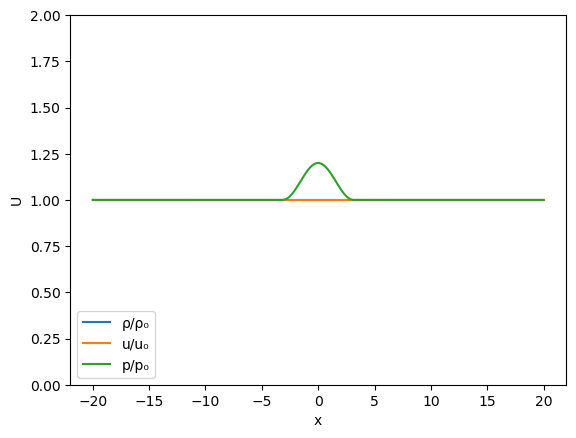

In [16]:
# Hodnoty velicin v nerozrusenem proudu
rho0   = 1.2
a0     = 340.0
u0     = 100.0
gamma0 = 1.4
p0  = rho0 * a0^2 / gamma0

function U0(x)
    U = [rho0; u0; p0]
    if abs(x) < PI
        U[3] += (cos(x)+1) * 0.1*p0
    end
    return U
end

x=range(-20, stop=20, length=200)

plot(x, [U0(xi)[1]/rho0  for xi in x], label="ρ/ρ₀")
plot(x, [U0(xi)[2]/u0 for xi in x], label="$u/u₀")
plot(x, [U0(xi)[3]/p0 for xi in x], label="p/p₀")
ylim(0,2); xlabel("x");
ylabel("U")
legend(loc="lower left");

In [17]:
R0 = subs.(subs.(R, rhoBar, rho0), aBar, a0)

3×3 Array{Sym,2}:
 1   4.32525951557093e-6  4.32525951557093e-6
 0  -0.00122549019607843  0.00122549019607843
 0                   1/2                  1/2

In [18]:
R01 = subs.(subs.(R1, rhoBar, rho0), aBar, a0)

3×3 Array{Sym,2}:
 1                  0  -8.65051903114187e-6
 0  -408.000000000000                     1
 0   408.000000000000                     1

In [19]:
R0*R01

3×3 Array{Sym,2}:
 1                 0  0
 0  1.00000000000000  0
 0                 0  1

In [20]:
λ0 = subs.(subs.(λ, uBar, u0), aBar, a0)

3-element Array{Sym,1}:
  100.000000000000
 -240.000000000000
  440.000000000000

In [21]:
V0(x) = R01*U0(x);

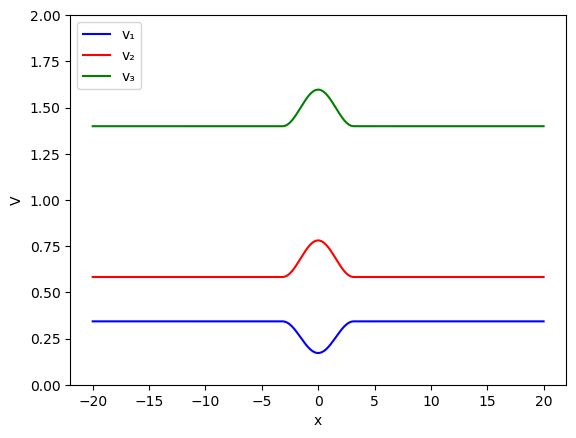

In [22]:
plot(x, [V0(xi)[1]  for xi in x], "-b", label="v₁")
plot(x, [V0(xi)[2]/1e5  for xi in x], "-r", label="v₂")
plot(x, [V0(xi)[3]/1e5  for xi in x], "-g", label="v₃")
ylim(0,2)
xlabel("x"); ylabel("V");
legend(loc="upper left");

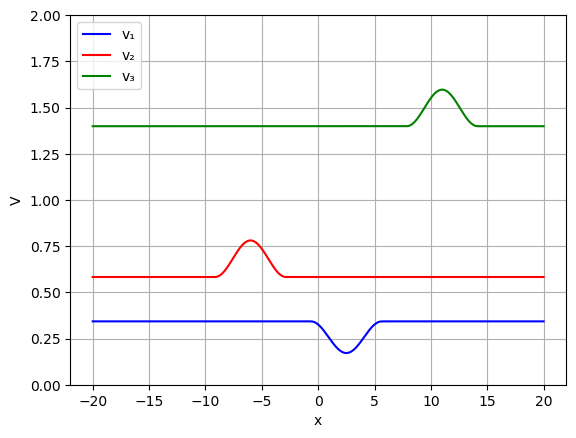

In [23]:
Vt(x,t) = [V0(x-λ0[1]*t)[1]; V0(x-λ0[2]*t)[2]; V0(x-λ0[3]*t)[3]]

t=0.025

plot(x, [Vt(xi,t)[1]  for xi in x], "-b", label="v₁")
plot(x, [Vt(xi,t)[2]/1e5  for xi in x], "-r", label="v₂")
plot(x, [Vt(xi,t)[3]/1e5  for xi in x], "-g", label="v₃")
ylim(0,2); grid(true)
xlabel("x"); ylabel("V");
legend(loc="upper left");

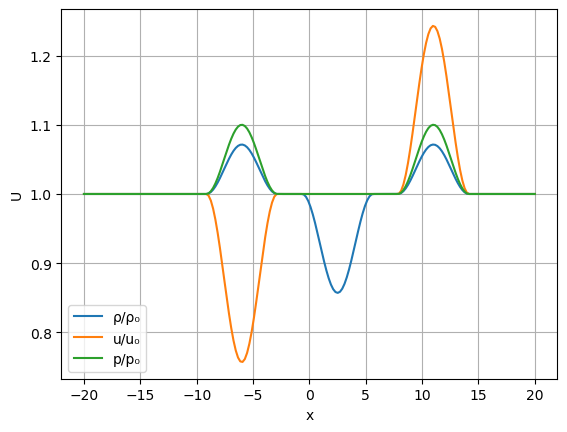

In [24]:
Ut(x,t) = R0*Vt(x,t)

plot(x, [Ut(xi,t)[1]/rho0  for xi in x], label="ρ/ρ₀")
plot(x, [Ut(xi,t)[2]/u0  for xi in x], label="u/u₀")
plot(x, [Ut(xi,t)[3]/p0  for xi in x], label="p/p₀")
xlabel("x");
ylabel("U");
grid(true)
legend(loc="lower left");

## Smíšená úloha

Poznámka: úlohu řešíme numericky pomocí Laxova-Wendroffova schématu.

In [25]:
A0 = Float64.(subs.(subs.(subs.(A, rhoBar, rho0), uBar, u0), pBar, p0/gamma))

3×3 Array{Float64,2}:
 100.0      1.2    0.0     
   0.0    100.0    0.833333
   0.0  99085.7  100.0     

In [26]:
function LW(U0, T, Δt, Δx, A, Uleft, Uright)
    U = copy(U0)
    Unew = similar(U)
    
    t = 0.0;
    n = size(U0,2)
    
    while (t<T)
        
        for i = 2:n-1
            Unew[:,i] = U[:,i] - A*Δt/(2*Δx) * (U[:,i+1] - U[:,i-1]) + (A*Δt/Δx)^2/2 * (U[:,i+1]-2*U[:,i]+U[:,i-1])
        end
        
        for i = 2:n-1
            U[:,i] = Unew[:,i]
        end
        
        U[:,1] = Uleft(U[:,2])
        U[:,n] = Uright(U[:,n-1])
        
        t = t + Δt
        #println("t=",t)
    end
    
    return U
end

LW (generic function with 1 method)

In [27]:
Δx = 40 * 0.01
xx = collect(-20:Δx:20)
Δt = 0.8 * Δx/maximum(λ0);

In [28]:
Uini = zeros(Float64,3,size(xx,1));
for i=1:size(Uini,2)
    Uini[:,i] = U0(-20 + (i-1)*Δx)
end
Uini

3×101 Array{Float64,2}:
     1.2      1.2      1.2      1.2  …      1.2      1.2      1.2      1.2
   100.0    100.0    100.0    100.0       100.0    100.0    100.0    100.0
 99085.7  99085.7  99085.7  99085.7     99085.7  99085.7  99085.7  99085.7

In [29]:
function fixedValue(U) 
    return U0(-20.0)
end

fixedValue (generic function with 1 method)

In [30]:
U025 = LW(Uini, 0.025, Δt, Δx, A0, fixedValue, fixedValue);

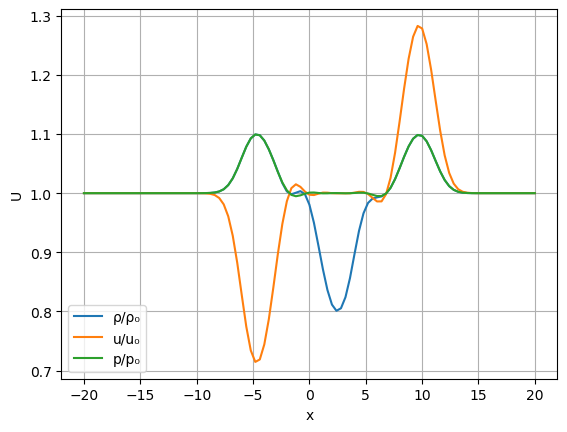

In [31]:
plot(xx, U025[1,:]./rho0, label="ρ/ρ₀")
plot(xx, U025[2,:]./u0, label="u/u₀")
plot(xx, U025[3,:]./p0, label="p/p₀")
xlabel("x");
ylabel("U");
grid(true)
legend(loc="lower left");

In [32]:
U05 = LW(U025, 0.025, Δt, Δx, A0, fixedValue, fixedValue);

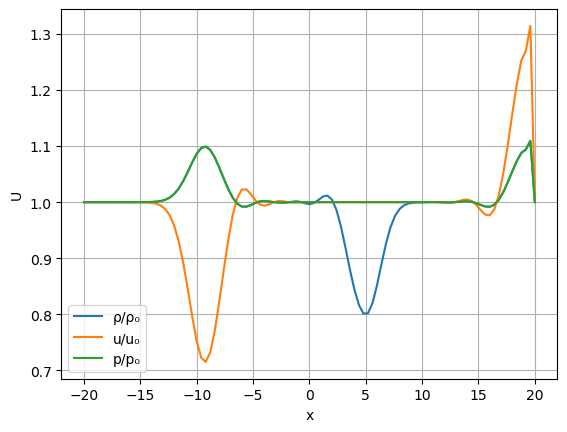

In [33]:
plot(xx, U05[1,:]./rho0, label="ρ/ρ₀")
plot(xx, U05[2,:]./u0, label="u/u₀")
plot(xx, U05[3,:]./p0, label="p/p₀")
xlabel("x");
ylabel("U");
grid(true)
legend(loc="lower left");

### Charakteristická podmínka na pravém okraji

Předpokládám u>0, u<a => zadáváme jednu okrajovou podmínku odpovídajicí vlastnímu číslu u-a, tj. 
$$ v_2 = p - \bar{\rho}\bar{a} u$$

In [34]:
function characteristicOutlet(U)
    V = Float64.(R01) * U

    V[2] = p0 - rho0*a0*u0
    
    return Float64.(R0) * V
end

characteristicOutlet (generic function with 1 method)

In [35]:
U05c = LW(U025, 0.025, Δt, Δx, A0, fixedValue, characteristicOutlet);

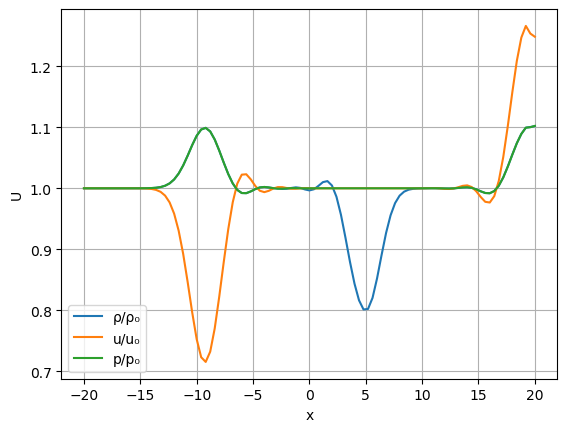

In [36]:
plot(xx, U05c[1,:]./rho0, label="ρ/ρ₀")
plot(xx, U05c[2,:]./u0, label="u/u₀")
plot(xx, U05c[3,:]./p0, label="p/p₀")
xlabel("x");
ylabel("U");
grid(true)
legend(loc="lower left");

### Podmínka s předepsaným tlakem na pravém okraji

Předpokládám u>0, u<a => zadáváme jednu okrajovou podmínku 

In [37]:
function pressureOutlet(U)
    Ub = copy(U)
    Ub[3] = p0
    return Ub
end

pressureOutlet (generic function with 1 method)

In [38]:
U05p = LW(U025, 0.025, Δt, Δx, A0, fixedValue, pressureOutlet);

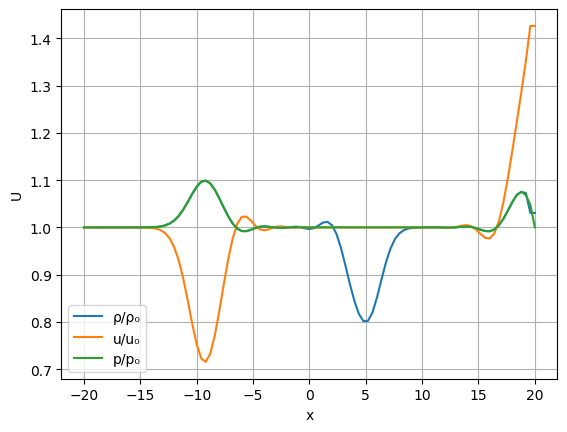

In [39]:
plot(xx, U05p[1,:]./rho0, label="ρ/ρ₀")
plot(xx, U05p[2,:]./u0, label="u/u₀")
plot(xx, U05p[3,:]./p0, label="p/p₀")
xlabel("x");
ylabel("U");
grid(true)
legend(loc="lower left");